<a href="https://colab.research.google.com/github/mralamdari/Computer-Vision-Papers/blob/main/LeNet_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

tf.__version__

'2.11.0'

#Data 
[Source](https://www.kaggle.com/datasets/csafrit2/plant-leaves-for-image-classification)

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive'
!kaggle datasets download -d csafrit2/plant-leaves-for-image-classification
!unzip \*.zip && rm .zip

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory  = '/content/Plants_2/train/',
    label_mode = 'categorical',
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (224, 224),
    shuffle    = True
)


valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory  = '/content/Plants_2/valid/',
    label_mode = 'categorical',
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (224, 224),
    shuffle    = True
)


test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory  = '/content/Plants_2/test/',
    label_mode = 'categorical',
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (224, 224),
    shuffle    = True
)

Found 4274 files belonging to 22 classes.
Found 110 files belonging to 22 classes.
Found 110 files belonging to 22 classes.


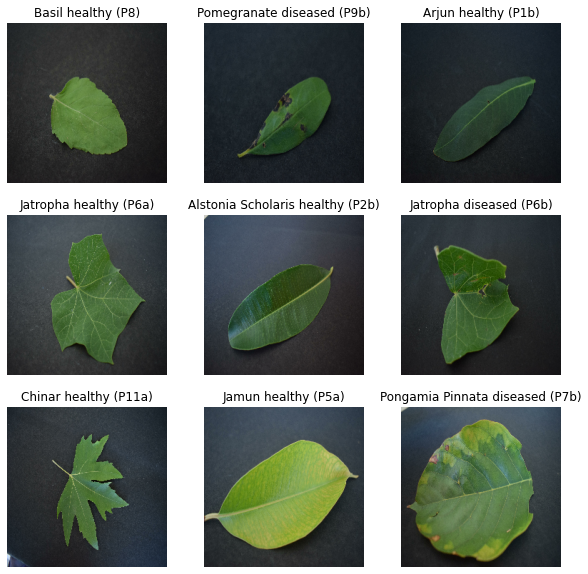

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(test_ds.class_names[np.argmax(labels[i])])
    plt.axis('off')

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'), 
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=120, activation='relu'),
    tf.keras.layers.Dense(units=84, activation='relu'),
    tf.keras.layers.Dense(units=len(train_ds.class_names), activation='softmax')
])

In [10]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 220, 220, 6)       456       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 6)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 44944)             0         
                                                                 
 dense_3 (Dense)             (None, 120)              

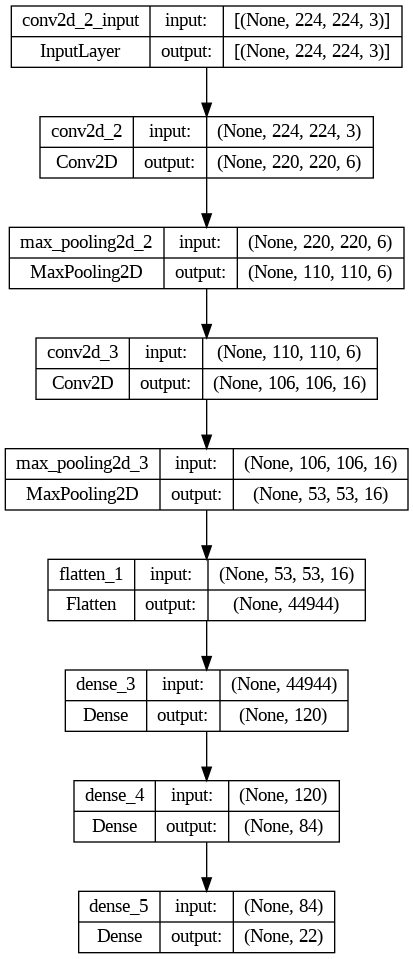

In [12]:
model.summary()
tf.keras.utils.plot_model(model, "LeNet.png", show_shapes=True)